In [7]:
# 필요 데이터 불러오기 및 출력하기
# 전체로 보기 위해서 print 사용
import pandas as pd

co2 = pd.read_csv('../result/CO2.csv')
no = pd.read_csv('../result/NO.csv')
ch4 = pd.read_csv('../result/CH4.csv')
Antartica_mass = pd.read_csv('../result/Antartica_mass.csv')
Antartica_mass

,Year,ice_mass
0,2002,-21.324747
1,2003,-1279.794133
2,2004,-3051.890000
3,2005,-2652.560000
4,2006,-1466.810000
5,2007,-3703.260000
6,2008,-6949.170000
7,2009,-6667.040000
8,2010,-10004.980000
9,2011,-11559.231515


In [8]:
# 데이터 2002년도 이후로만 있어서 이 값들 통일하기
co2 = co2.loc[co2.Year >= 2002, :]
no = no.loc[no.Year >= 2002, :]
ch4 = ch4.loc[ch4.Year >= 2002, :]

co2.reset_index(drop=True, inplace=True)
no.reset_index(drop=True, inplace=True)
ch4.reset_index(drop=True, inplace=True)

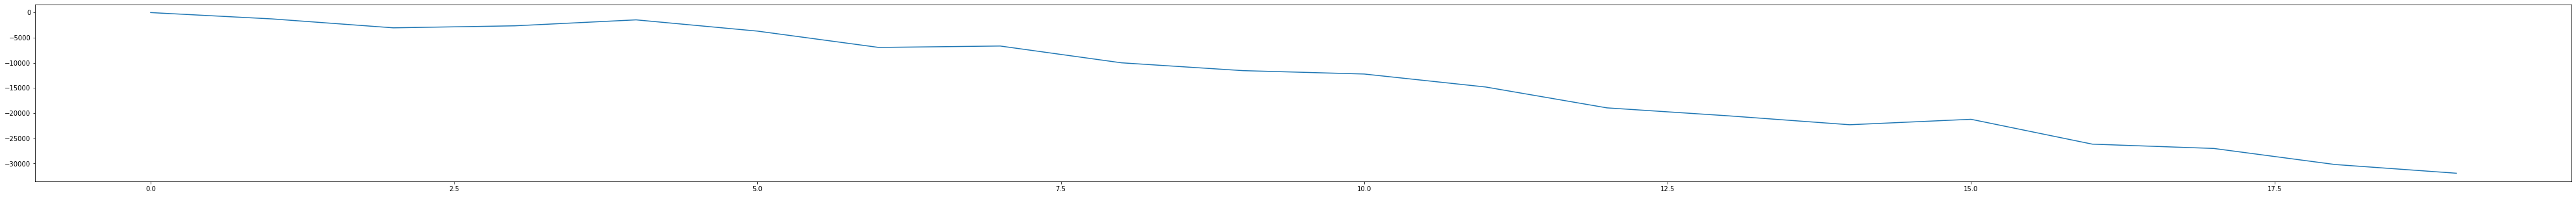

In [9]:
# 한번 matlot으로 종속변수 보기
import matplotlib.pyplot as plt

plt.figure(figsize = (70, 5))
Antartica_mass['ice_mass'].plot()
plt.show()

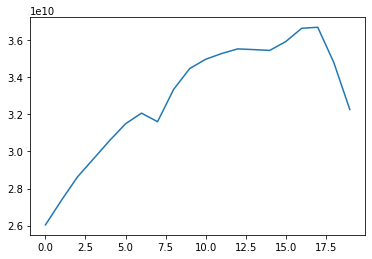

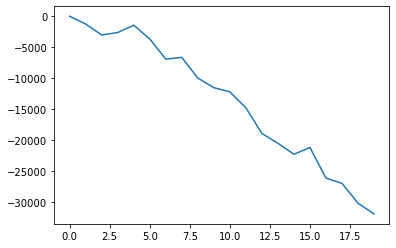

In [12]:
data = pd.merge(co2, no, on='Year')
data = pd.merge(data, ch4, on='Year')
data = pd.merge(data, Antartica_mass, on='Year')

# print(data)
data['CO2'].plot()
plt.show()

data['ice_mass'].plot()
plt.show()

In [21]:
x = data[['CO2', 'NO','CH4' ]]
y = data['ice_mass'].values
print(len(x), len(y))

20 20


In [15]:
# 다항 비선형 회귀 사용해서 예측하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# x_poly = poly_features.fit_transform(x)
# print(x_poly)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x, y)
print('intercept:', lin_reg.intercept_)
print('coefficients:', lin_reg.coef_)


# X_test = data[['CH4', 'NO', 'CO2']]
# x_test_poly = poly_features.fit_transform(X_test)

result = list(lin_reg.predict(x))
print(y)
print(result)
print((-3.19533600e+04 - -33501.21722044106)/3.19533600e+04 * 100)

intercept: 175923.43938991136
coefficients: [ 1.10554369e-06 -4.94593152e-05 -1.03707343e-05]
[-2.13247470e+01 -1.27979413e+03 -3.05189000e+03 -2.65256000e+03
 -1.46681000e+03 -3.70326000e+03 -6.94917000e+03 -6.66704000e+03
 -1.00049800e+04 -1.15592315e+04 -1.22346399e+04 -1.48117948e+04
 -1.89596050e+04 -2.05423741e+04 -2.23142507e+04 -2.12304322e+04
 -2.61728074e+04 -2.70267600e+04 -3.02220600e+04 -3.19533600e+04]
[2934.333256378566, 2031.837168297352, -3201.0268503936823, -3319.5028982397052, -5816.055664281506, -8056.199442139332, -6597.1376954732405, -7139.258570171049, -9975.405383982987, -13613.179419859138, -15141.563454884657, -13503.674788090488, -17073.013107408653, -19231.701119648496, -19930.419638059277, -23483.254296069237, -23575.103546569473, -25956.646730455454, -28675.95510629611, -33501.21722002144]
4.844114110193918


In [16]:
# MAPE를 통해서 ACCURACY가 얼마나 되는 확보하기
mae_sum = 0
for i in range(len(y)):
    mae_sum += (abs(y[i] - result[i])/-y[i])
mae = mae_sum / len(y)
print((1 -mae) * 100)

-634.367331686595


In [17]:
# import xgboost as xgb

# xgb_model = xgb.XGBRegressor()
# xgb_model.fit(x, y)
# xgb.plot_importance(xgb_model)
# result = list(xgb_model.predict(x))

In [18]:
# 2050까지의 데이터 들고오기 

co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')

# co2_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/co2_2050.csv')
# CH4_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/CH4_2050.csv')
# NO_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/NO_2050.csv')

# print(co2_2050, CH4_2050, NO_2050)

# 데이터 통일하기
co2_2050 = co2_2050.loc[co2_2050.Year >= 2002, :]
co2_2050.reset_index(drop=True, inplace=True)
CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2002, :]
CH4_2050.reset_index(drop=True, inplace=True)
NO_2050 = NO_2050.loc[NO_2050.Year >= 2002, :]
NO_2050.reset_index(drop=True, inplace=True)
# print(co2_2050_result)

data_2050 = pd.merge(co2_2050, NO_2050, on='Year')

# co2, ch4, 데이터 연도 기준으로 합치기

data_2050 = pd.merge(data_2050, CH4_2050, on='Year')

# 다항 비선형 회귀 사용해서 예측하기
x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]
print(x_future_data)

             CH4            NO           CO2
0   7.199600e+09  2.570020e+09  2.603919e+10
1   7.262510e+09  2.604750e+09  2.736672e+10
2   7.505180e+09  2.687850e+09  2.862753e+10
3   7.556280e+09  2.701330e+09  2.960278e+10
4   7.749950e+09  2.733120e+09  3.058353e+10
5   7.729960e+09  2.802950e+09  3.149374e+10
6   7.782220e+09  2.775360e+09  3.206944e+10
7   7.812910e+09  2.769550e+09  3.160704e+10
8   7.909880e+09  2.845370e+09  3.334330e+10
9   8.050430e+09  2.914600e+09  3.446845e+10
10  8.141110e+09  2.937790e+09  3.497408e+10
11  8.109300e+09  2.918250e+09  3.528303e+10
12  8.266810e+09  2.963010e+09  3.553444e+10
13  8.315910e+09  2.995510e+09  3.549641e+10
14  8.227180e+09  3.027260e+09  3.545246e+10
15  8.333400e+09  3.087400e+09  3.592574e+10
16  8.489970e+09  3.072530e+09  3.664614e+10
17  8.609920e+09  3.096790e+09  3.670250e+10
18  8.536440e+09  3.124815e+09  3.179837e+10
19  8.598050e+09  3.152652e+09  3.216606e+10
20  8.659659e+09  3.180490e+09  3.253571e+10
21  8.7212

In [19]:
result_2030 = list(lin_reg.predict(x_future_data))
data_2050['ice_mass'] = result_2030
print(data_2050)

      Year           CO2            NO           CH4       ice_mass
0   2002.0  2.603919e+10  2.570020e+09  7.199600e+09 -213274.054177
1   2003.0  2.736672e+10  2.604750e+09  7.262510e+09 -228689.705535
2   2004.0  2.862753e+10  2.687850e+09  7.505180e+09 -245607.019534
3   2005.0  2.960278e+10  2.701330e+09  7.556280e+09 -256331.235359
4   2006.0  3.058353e+10  2.733120e+09  7.749950e+09 -267860.565389
5   2007.0  3.149374e+10  2.802950e+09  7.729960e+09 -280775.962927
6   2008.0  3.206944e+10  2.775360e+09  7.782220e+09 -285324.068966
7   2009.0  3.160704e+10  2.769550e+09  7.812910e+09 -280207.334272
8   2010.0  3.334330e+10  2.845370e+09  7.909880e+09 -301856.409471
9   2011.0  3.446845e+10  2.914600e+09  8.050430e+09 -316793.730235
10  2012.0  3.497408e+10  2.937790e+09  8.141110e+09 -323084.131689
11  2013.0  3.528303e+10  2.918250e+09  8.109300e+09 -325356.903582
12  2014.0  3.553444e+10  2.963010e+09  8.266810e+09 -330003.953268
13  2015.0  3.549641e+10  2.995510e+09  8.315910

C:\Users\socia\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [20]:
result_2030 = list(xgb_model.predict(x_future_data))

print(data_2050)

NameError: name 'xgb_model' is not defined

In [21]:
data_2050['Temperature'] = result_2030

print(data_2050)

      Year           CO2            NO           CH4       ice_mass  \
0   2002.0  2.603919e+10  2.570020e+09  7.199600e+09 -213274.054177   
1   2003.0  2.736672e+10  2.604750e+09  7.262510e+09 -228689.705535   
2   2004.0  2.862753e+10  2.687850e+09  7.505180e+09 -245607.019534   
3   2005.0  2.960278e+10  2.701330e+09  7.556280e+09 -256331.235359   
4   2006.0  3.058353e+10  2.733120e+09  7.749950e+09 -267860.565389   
5   2007.0  3.149374e+10  2.802950e+09  7.729960e+09 -280775.962927   
6   2008.0  3.206944e+10  2.775360e+09  7.782220e+09 -285324.068966   
7   2009.0  3.160704e+10  2.769550e+09  7.812910e+09 -280207.334272   
8   2010.0  3.334330e+10  2.845370e+09  7.909880e+09 -301856.409471   
9   2011.0  3.446845e+10  2.914600e+09  8.050430e+09 -316793.730235   
10  2012.0  3.497408e+10  2.937790e+09  8.141110e+09 -323084.131689   
11  2013.0  3.528303e+10  2.918250e+09  8.109300e+09 -325356.903582   
12  2014.0  3.553444e+10  2.963010e+09  8.266810e+09 -330003.953268   
13  20

In [22]:
for i in range(18, 29):
    if i % 10 == 1:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 1500
    elif i% 10 == 3:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 3000
    elif i% 10 == 4:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 5:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000
    elif i% 10 == 6:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    elif i% 10 == 7:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 8:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 3000
    elif i% 10 == 9:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    else:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000

<AxesSubplot:>

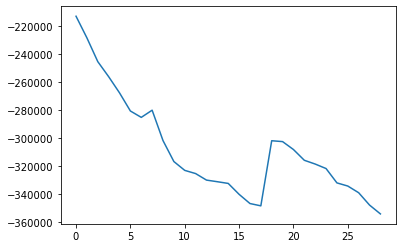

In [23]:
data_2050.loc[:, 'ice_mass'].plot()